In [1]:
# Importation of our own tools
import portfolio_functions as pf
import tickers_select as tckrs
%load_ext autoreload
%autoreload 2

# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={"figure.figsize":(12, 8)},style="whitegrid")
plt.rcParams['font.family'] = 'serif'

# 1. Formating Datas

In [2]:
# Importation of the prices
prices = pd.read_csv("datas/adjusted_daily_prices.csv", index_col=0, parse_dates=True)
# Importation of the selected tickers
tickers = tckrs.tickers4

prices_msci = prices
prices = prices[tickers]

# Plotting of the DataFrame
prices.head()

,MC.PA,CFR.SW,RMS.PA,KER.PA,CAP.PA,IDEXF,6S=F,AMS.MC,SAMPO.HE,G.MI,...,VIV.PA,PNDORA.CO,WFDRX,MB.MI,ATL.MI,BOL.PA,SECU-B.ST,IDVA.SG,LBGUF,MF.PA
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,56.599998,16.481361,49.166664,68.918274,24.090000,12.160347,0.649740,11.9,10.039844,22.845453,...,23.380651,35.378469,23.392708,11.380952,19.860001,0.595,12.785884,12.0,31.290252,54.200001
2005-01-04,56.299999,16.288680,48.833332,68.964745,23.850000,12.332502,0.645838,11.9,9.892054,22.945454,...,23.758072,35.373235,23.723880,11.495238,20.049999,0.595,12.710694,12.0,31.733229,53.849998
2005-01-05,55.450001,15.938569,48.299999,68.128250,23.820000,12.334303,0.646083,11.9,9.823085,22.827272,...,23.661297,35.352312,23.727345,11.704761,19.980000,0.590,12.515922,12.0,31.737864,54.150002
2005-01-06,55.650002,16.181642,48.366665,68.453552,23.670000,12.425048,0.647802,11.9,10.325570,22.700001,...,23.535492,35.348986,23.901911,11.895238,19.850000,0.590,12.366672,12.0,31.971365,54.400002
2005-01-07,56.049999,16.110859,47.933334,69.150635,23.379999,12.541183,0.648267,11.9,10.325570,22.681818,...,23.564524,35.348986,24.125318,11.876190,19.850000,0.588,12.395002,12.0,32.270195,54.299999


In [3]:
prices_msci.head()

,NSRGY,ASML,ROG.SW,MC.PA,NVO,NVS,VTI,SAP,SIE.DE,SNY,...,MF.PA,TIT.MI,ADE.OL,KGX.DE,SALM.OL,UPS,ROCK-B.CO,VSBY.CN,PROX.BR,UN01.DE
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,19.406073,13.137519,85.102253,56.599998,3.934667,33.440810,43.504051,32.694855,61.000427,29.547120,...,54.200001,3.06,10.817800,23.540001,4.735596,63.103147,37.261734,0.51,32.770000,10.3
2005-01-04,19.304356,12.883060,84.902008,56.299999,3.858613,33.091171,43.532679,31.870259,60.661266,29.513681,...,53.849998,3.06,10.759532,23.540001,4.710088,63.183368,37.928716,0.51,32.930000,10.3
2005-01-05,19.382477,12.698572,84.532489,55.450001,3.821526,32.967802,43.237832,31.784551,59.779449,29.088776,...,54.150002,3.03,10.776711,23.540001,4.717609,63.064586,37.570233,0.51,32.450001,10.3
2005-01-06,19.403709,12.587189,84.744668,55.650002,3.949011,33.026834,43.764542,32.465939,60.341488,28.824900,...,54.400002,3.06,10.773975,23.540001,4.716411,63.460296,37.365088,0.51,32.160000,10.3
2005-01-07,19.447257,12.592865,84.661544,56.049999,4.004297,32.965059,44.031957,33.198153,60.651573,29.025414,...,54.299999,3.06,10.819771,23.540001,4.736458,63.930943,37.633902,0.51,32.160000,10.3


In [4]:
# Calculation of the returns and we remove the NaN (at the beginning of the DataFrame and at the end)
rends = prices.pct_change().dropna()
rends_msci = prices_msci.pct_change()

In [5]:
rends_msci.isna().sum().sort_values(ascending=False)

CNH=X      4639
CBK.DE     4639
SW.PA      4639
SEK=F      4639
NSRGY         1
           ... 
SGSN.SW       1
SY1.DE        1
KRZ.IR        1
CABK.MC       1
UN01.DE       1
Length: 313, dtype: int64

In [6]:
rends_msci.drop(["CNH=X","CBK.DE","SW.PA","SEK=F"],axis=1,inplace=True)

In [7]:
# Printing of the returns
rends.head()

,MC.PA,CFR.SW,RMS.PA,KER.PA,CAP.PA,IDEXF,6S=F,AMS.MC,SAMPO.HE,G.MI,...,VIV.PA,PNDORA.CO,WFDRX,MB.MI,ATL.MI,BOL.PA,SECU-B.ST,IDVA.SG,LBGUF,MF.PA
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,-0.005300,-0.011691,-0.006780,0.000674,-0.009963,0.014157,-0.006006,0.0,-0.014720,0.004377,...,0.016142,-0.000148,0.014157,0.010042,0.009567,0.000000,-0.005881,0.0,0.014157,-0.006458
2005-01-05,-0.015098,-0.021494,-0.010921,-0.012129,-0.001258,0.000146,0.000379,0.0,-0.006972,-0.005151,...,-0.004073,-0.000591,0.000146,0.018227,-0.003491,-0.008403,-0.015323,0.0,0.000146,0.005571
2005-01-06,0.003607,0.015251,0.001380,0.004775,-0.006297,0.007357,0.002661,0.0,0.051154,-0.005575,...,-0.005317,-0.000094,0.007357,0.016273,-0.006506,0.000000,-0.011925,0.0,0.007357,0.004617
2005-01-07,0.007188,-0.004374,-0.008959,0.010183,-0.012252,0.009347,0.000719,0.0,0.000000,-0.000801,...,0.001234,0.000000,0.009347,-0.001601,0.000000,-0.003390,0.002291,0.0,0.009347,-0.001838
2005-01-10,-0.006244,0.006278,0.019471,-0.002016,0.065868,-0.003736,-0.001618,0.0,-0.018130,-0.003206,...,-0.006982,-0.000040,-0.003736,0.008019,0.011083,0.002551,0.008505,0.0,-0.003736,0.014733


In [8]:
# Printing of the returns
rends.tail()

,MC.PA,CFR.SW,RMS.PA,KER.PA,CAP.PA,IDEXF,6S=F,AMS.MC,SAMPO.HE,G.MI,...,VIV.PA,PNDORA.CO,WFDRX,MB.MI,ATL.MI,BOL.PA,SECU-B.ST,IDVA.SG,LBGUF,MF.PA
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-25,-0.002848,-0.012240,-0.005716,-0.004382,0.001392,0.000781,0.000781,0.010933,-0.000208,-0.001180,...,0.004847,0.004541,0.000781,0.005335,-0.000436,0.003791,-0.015145,0.008983,0.000781,0.000565
2022-11-28,-0.002142,0.021559,0.011836,-0.000183,-0.010283,-0.009539,-0.000583,-0.014677,-0.009361,-0.013290,...,-0.006201,0.018145,-0.011035,-0.009764,0.000436,-0.008499,-0.009383,-0.026710,0.003914,-0.016384
2022-11-29,0.004723,0.023248,-0.008021,0.013573,-0.029767,0.001736,-0.002621,-0.003136,0.014910,0.014068,...,-0.012018,0.001231,-0.001462,-0.007931,0.000000,-0.002857,-0.009452,0.009148,0.002125,0.000000
2022-11-30,0.000000,0.021379,0.032682,0.026240,0.033864,0.011763,0.011194,0.023594,0.008070,0.010921,...,0.041404,0.053513,0.038039,-0.009939,0.000436,0.042980,-0.033151,0.001236,0.002038,0.029293
2022-12-01,0.000000,0.001698,0.000000,0.000000,0.000000,0.019739,-0.001594,0.000000,0.000000,0.000000,...,0.000000,-0.000112,0.000000,0.000000,0.000000,0.000000,0.001610,0.000000,0.000000,0.000000


# 2. First static analysis

## a. Details

In this first practical part we will set up and analyze different portfolio strategies (different optimization techniques) in a fairly simple way by considering the period from 2005 to 2010 as test data. This is a static part that is only carried out to understand the functioning of the different optimization functions. Later we will add a dynamic optimization (definition of new weights every quarter) and in the final part we will take into account transaction costs to be more faithful to reality.

In [9]:
# We define the start and end dates of our training set
start_train = "2005-01-01"
end_train = "2010-01-01"
end_test = "2022-01-01"

In [10]:
# We use the separate function of the portfolio_functions module to obtain our training and test DataFrames
rends_train,rends_test = pf.separate(rends,start_train,end_train,end_test)

# We delete the assets that have only null returns or negative annualized returns with the supr_assets function
rends_train,rends_test = pf.supr_assets(rends_train,show=True),pf.supr_assets(rends_test,show=True)

The following assets will be suppressed:
IDEXF AMS.MC G.MI VNA.DE CABK.MC KBC.BR EBS.VI AENA.MC EXO.AS GBLC.CN BVI.PA VIV.PA PNDORA.CO WFDRX MB.MI ATL.MI SECU-B.ST IDVA.SG LBGUF MF.PA
The following assets will be suppressed:
G.MI CABK.MC EXO.AS GBLC.CN VIV.PA ATL.MI


In [11]:
# On utilise la fonction separate du module portfolio_functions pour obtenir nos DataFrames d'entrainement et de tests We use the separate function of the portfolio_functions module to obtain our training and test DataFrames
prices_train,prices_test = pf.separate(prices,start_train,end_train,end_test)

In [12]:
rends_train.head()

,MC.PA,CFR.SW,RMS.PA,KER.PA,CAP.PA,6S=F,SAMPO.HE,PUB.PA,SHB-A.ST,HNR1.DE,RAND.AS,BOL.PA
Date,,,,,,,,,,,,
2005-01-04,-0.005300,-0.011691,-0.006780,0.000674,-0.009963,-0.006006,-0.014720,-0.001248,-0.001558,0.001372,-0.001721,0.000000
2005-01-05,-0.015098,-0.021494,-0.010921,-0.012129,-0.001258,0.000379,-0.006972,0.007500,-0.012335,0.001712,-0.021027,-0.008403
2005-01-06,0.003607,0.015251,0.001380,0.004775,-0.006297,0.002661,0.051154,0.004963,-0.003103,-0.002051,0.014084,0.000000
2005-01-07,0.007188,-0.004374,-0.008959,0.010183,-0.012252,0.000719,0.000000,-0.006173,0.005221,0.005824,-0.006250,-0.003390
2005-01-10,-0.006244,0.006278,0.019471,-0.002016,0.065868,-0.001618,-0.018130,0.013665,0.019979,-0.002725,-0.000699,0.002551


In [13]:
rends_test.head()

,MC.PA,CFR.SW,RMS.PA,KER.PA,CAP.PA,IDEXF,6S=F,AMS.MC,SAMPO.HE,VNA.DE,...,BVI.PA,RAND.AS,PNDORA.CO,WFDRX,MB.MI,BOL.PA,SECU-B.ST,IDVA.SG,LBGUF,MF.PA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.004083,0.015476,0.003215,0.033001,0.043165,-0.006719,-0.001480,0.0,0.000000,0.0,...,0.019503,0.039828,-0.000081,-0.006719,0.000000,0.014354,0.008178,0.0,-0.006719,0.049065
2010-01-05,-0.004701,0.004929,0.005341,-0.014594,0.012444,0.004039,-0.000093,0.0,-0.001749,0.0,...,-0.004850,0.014742,0.000000,0.004039,0.029833,0.002573,0.006940,0.0,0.004039,0.002784
2010-01-06,0.009702,0.010129,-0.003719,-0.012245,0.019843,-0.002643,0.002817,0.0,0.023364,0.0,...,0.001760,0.004752,0.000134,-0.002643,0.000579,0.010265,-0.005628,0.0,-0.002643,0.011771
2010-01-07,0.011379,0.008545,-0.011412,0.003070,-0.010454,0.006006,0.001149,0.0,0.000000,0.0,...,0.001757,0.029189,-0.000027,0.006006,0.022582,-0.000847,-0.000569,0.0,0.006006,0.002195
2010-01-08,0.013502,0.008923,0.020067,0.031780,0.004255,-0.006457,0.002262,0.0,0.015982,0.0,...,-0.006610,-0.007485,0.000081,-0.006457,-0.003397,0.001695,0.005391,0.0,-0.006457,0.006242


In [14]:
sorted(pf.annu_rend_df(rends_train).items(), key=lambda x: x[1], reverse=True)

[('BOL.PA', 0.13672),
 ('RMS.PA', 0.13278),
 ('SAMPO.HE', 0.10661),
 ('CFR.SW', 0.07216),
 ('MC.PA', 0.0654),
 ('CAP.PA', 0.05662),
 ('RAND.AS', 0.03628),
 ('PUB.PA', 0.03376),
 ('HNR1.DE', 0.02695),
 ('KER.PA', 0.02514),
 ('SHB-A.ST', 0.01086),
 ('6S=F', 0.00741)]

## b. Equally Weighted Portfolio

Certainly the easiest portfolio to create because we just have to allocate this weighting strategy:
$$
\boxed{\omega_{i} = \frac{1}{\#\textrm{assets}},\forall i \in\textrm{assets}}
$$

In [15]:
# We define a dictionary containing the weights associated with each asset
w_equal = {asset:round(1/len(rends_train.columns),3) for asset in rends_train.columns}

# We define a dictionary containing the weights associated with each asset
for key,value in w_equal.items():
    print(f'Asset considéré : {key} ; poid associé : {value}')
print(f"Somme de l'ensemble des poids : {round(sum(w_equal.values()),5)}")
# We remark that the sum of the weights is greater than 1 which is due to the rounding on the weights

Asset considéré : MC.PA ; poid associé : 0.083
Asset considéré : CFR.SW ; poid associé : 0.083
Asset considéré : RMS.PA ; poid associé : 0.083
Asset considéré : KER.PA ; poid associé : 0.083
Asset considéré : CAP.PA ; poid associé : 0.083
Asset considéré : 6S=F ; poid associé : 0.083
Asset considéré : SAMPO.HE ; poid associé : 0.083
Asset considéré : PUB.PA ; poid associé : 0.083
Asset considéré : SHB-A.ST ; poid associé : 0.083
Asset considéré : HNR1.DE ; poid associé : 0.083
Asset considéré : RAND.AS ; poid associé : 0.083
Asset considéré : BOL.PA ; poid associé : 0.083
Somme de l'ensemble des poids : 0.996


In [16]:
# We calculate the return of our portfolio and we create a new column
Portfolio = pd.Series((rends_train*w_equal.values()).sum(axis=1),name="Portfolio")

Text(0.5, 1.0, 'Rendements observés sur la période 2005-01-01 - 2010-01-01')

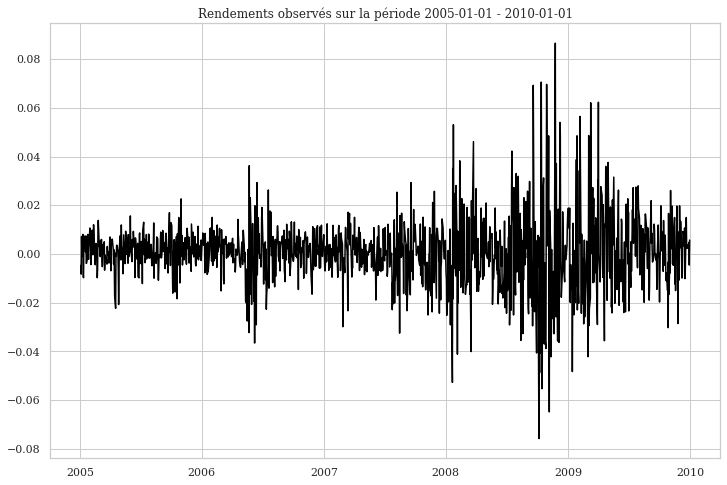

In [17]:
plt.plot(Portfolio,'black')
plt.title("Rendements observés sur la période {} - {}".format(start_train,end_train))

In [18]:
# The calculation of the annualized return is done with the annu_rend function of the portfolio_functions module
annu_rend = pf.annu_rend(Portfolio,show=True)
annu_rend = pf.portfolio_rend(np.array(list(w_equal.values())),rends_train,show=True)
# The two functions are equivalent, they will be used later

# The calculation of the annualized volatility is done with the annu_vol function of the portfolio_functions module
annu_vol = pf.annu_vol(Portfolio,show=True)
annu_vol = pf.portfolio_vol(np.array(list(w_equal.values())),pf.cov(rends_train),show=True)
annu_var = pf.portfolio_var(np.array(list(w_equal.values())),pf.cov(rends_train),show=True)
# The two functions are equivalent, they will be used later

Annualized return on the period: 9.293%.
Annualized return on the period: 9.293%.
Annualized volatility on the period: 22.291%.
Annualized volatility on the period: 22.291%.
Annualized variance on the period: 4.969%.


## c. Mean-Variance Portfolio

We are gonna implement some optimization methods taking into account some constraints. Here we want to optimize the weights in order to minimize the volatility of our portfolio while respecting some constraints:
$$
\textrm{min}\, \omega^{T}\Sigma\omega\\\textrm{s.t}\, \mu^{T}\omega=\mu_{obj} \, \textrm{and} \, \sum_{i=0}^{n}\omega_{i}=1
$$

Where $\omega$ is the weights vector, $\Sigma$ the covariance matrix of our asset bucket, $\mu$ is the annualized returns vector and $\mu_{obj}$ is the objective return.

In [19]:
# To calculate the annualized covariance we use the annu_cov function of the pf module
cov = pf.cov(rends_train)
cov

,MC.PA,CFR.SW,RMS.PA,KER.PA,CAP.PA,6S=F,SAMPO.HE,PUB.PA,SHB-A.ST,HNR1.DE,RAND.AS,BOL.PA
MC.PA,0.000373,0.000302,0.000199,0.000322,0.000283,-0.000029,0.000188,0.000193,0.000292,0.000212,0.000306,0.000103
CFR.SW,0.000302,0.000454,0.000190,0.000324,0.000282,-0.000030,0.000212,0.000185,0.000308,0.000201,0.000312,0.000116
RMS.PA,0.000199,0.000190,0.000409,0.000210,0.000184,-0.000015,0.000136,0.000130,0.000182,0.000125,0.000219,0.000079
KER.PA,0.000322,0.000324,0.000210,0.000548,0.000321,-0.000030,0.000231,0.000232,0.000323,0.000257,0.000356,0.000118
CAP.PA,0.000283,0.000282,0.000184,0.000321,0.000565,-0.000041,0.000210,0.000216,0.000298,0.000244,0.000342,0.000119
6S=F,-0.000029,-0.000030,-0.000015,-0.000030,-0.000041,0.000089,-0.000025,-0.000026,-0.000043,-0.000037,-0.000031,-0.000014
SAMPO.HE,0.000188,0.000212,0.000136,0.000231,0.000210,-0.000025,0.000402,0.000139,0.000253,0.000200,0.000275,0.000073
PUB.PA,0.000193,0.000185,0.000130,0.000232,0.000216,-0.000026,0.000139,0.000303,0.000202,0.000160,0.000226,0.000089
SHB-A.ST,0.000292,0.000308,0.000182,0.000323,0.000298,-0.000043,0.000253,0.000202,0.000626,0.000274,0.000343,0.000111
HNR1.DE,0.000212,0.000201,0.000125,0.000257,0.000244,-0.000037,0.000200,0.000160,0.000274,0.000593,0.000249,0.000110


Now all the functions are ready to plot an efficient frontier. The important point to know is the bounderies off my weights. We decided to autorise the short selling of assets in order to fit with the gmw portfolio formula. 

In [20]:
# The function opt_mean_variance returns the weights, the annualized return and the annualized volatility
w,r,vol = pf.opt_mean_variance(rends_train,pf.cov(rends_train),obj_rend=0.12071,show=True)

Annualized return on the period: 12.071%.
Annualized volatility on the period: 15.025%.


With a portfolio with the same return than the equally weighted portfolio, we found a smaller volatility. It's coherent because the equally weighted portfolio is note on the efficient frontier.

We created a function in order to find the global minimum variance weight and after return and volatility. The GMV weights are given by this formula:
$$
\boxed{\omega = \frac{\Sigma^{-1}1}{1\Sigma^{-1}1}}
$$

In [21]:
gmv_w,gmv_r, gmv_v = pf.gmv_portfolio(rends_train,cov,show=True)

Annualized return on the period: 5.587%.
Annualized volatility on the period: 10.91%.


We plot the efficient frontier using pf.efficient_frontier with the variable plot = True.

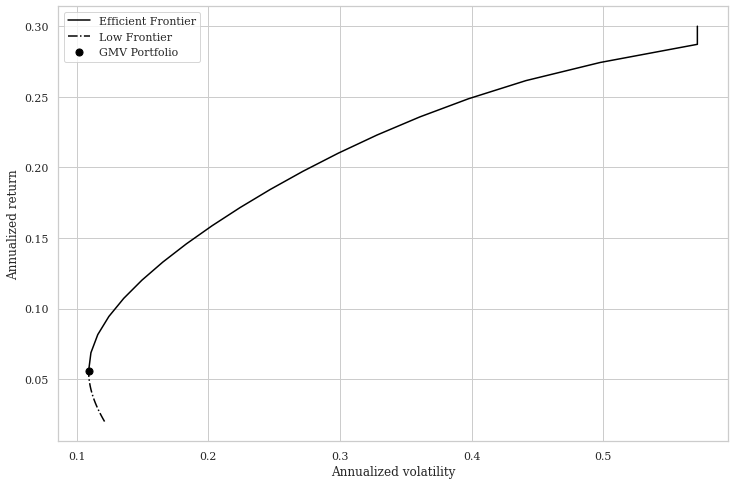

In [22]:
eff = pf.efficient_frontier(rends_train,cov,min=0.02,max=0.3,number=20,plot=True)

## d. Adding Capital Market Line

Calculating the Capital Market Line is just a modification of a constraint in the optimisation function. A new parameter is adding, it's the annualized risk free rate. The new formula for the constraint is the following:
$$
\textrm{min}\, \omega^{T}\Sigma\omega\\\textrm{s.t}\, \mu^{T}\omega+(1-\sum_{i=0}^{n}\omega_{i})r_{\textrm{risk-free rate}}=\mu_{obj} \, \textrm{and} \, \sum_{i=0}^{n}\omega_{i}=1
$$
To modelise this new constraint we just have to modify the optimization function by modifying the covariance matrix, and the returns DataFrame by adding the risk-free rate in them. We also create the new constraint.

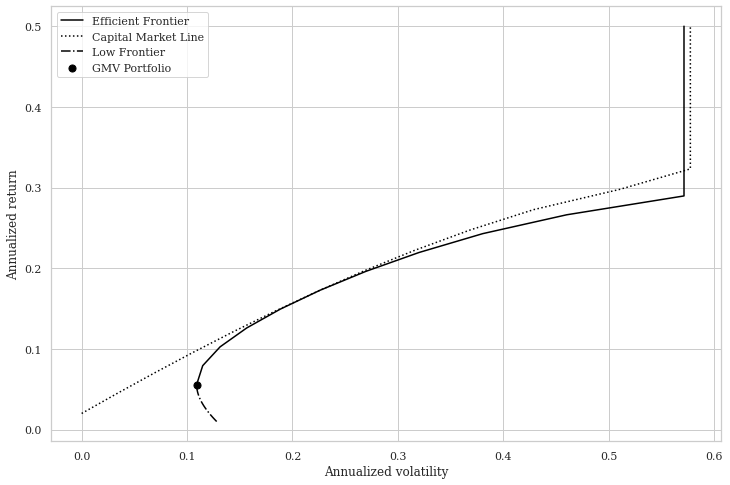

In [23]:
eff,eff_rf = pf.efficient_frontier(rends_train,cov,min=0.01,max=0.5,risk_free = 0.02,number=20,plot=True)

# 3. Dynamic analysis

In order to create a dynamic analysis we will use a function which create DataFrame as many as we want.

In [24]:
# If we want to recalculate the weights of the portfolio 4 times each year
dfs = pf.dynamic_df(rends_train,period_per_year=4)

In [25]:
for i in dfs.keys():
    # We check that the dates are correct for each DataFrame
    print(dfs[i].index[0],dfs[i].index[-1])
    print(dfs[i].shape)

2005-01-04 00:00:00 2005-04-01 00:00:00
(64, 9)
2005-04-04 00:00:00 2005-07-01 00:00:00
(65, 9)
2005-07-04 00:00:00 2005-09-30 00:00:00
(65, 10)
2005-10-03 00:00:00 2005-12-30 00:00:00
(65, 11)
2006-01-02 00:00:00 2006-03-30 00:00:00
(64, 10)
2006-03-31 00:00:00 2006-06-29 00:00:00
(65, 1)
2006-06-30 00:00:00 2006-09-28 00:00:00
(65, 10)
2006-09-29 00:00:00 2006-12-28 00:00:00
(65, 9)
2006-12-29 00:00:00 2007-03-28 00:00:00
(64, 7)
2007-03-29 00:00:00 2007-06-28 00:00:00
(65, 6)
2007-06-29 00:00:00 2007-09-27 00:00:00
(65, 3)
2007-09-28 00:00:00 2007-12-28 00:00:00
(65, 3)
2007-12-31 00:00:00 2008-03-31 00:00:00
(64, 4)
2008-04-01 00:00:00 2008-06-30 00:00:00
(65, 2)
2008-07-01 00:00:00 2008-09-29 00:00:00
(65, 5)
2008-09-30 00:00:00 2008-12-30 00:00:00
(65, 1)
2008-12-31 00:00:00 2009-03-31 00:00:00
(64, 4)
2009-04-01 00:00:00 2009-07-01 00:00:00
(65, 11)
2009-07-02 00:00:00 2009-09-30 00:00:00
(65, 12)
2009-10-01 00:00:00 2009-12-31 00:00:00
(65, 7)


In [26]:
weights = {}
# For each period we calculate the weights of the portfolio and we store them in the dictionary
for i in dfs.keys():
    w,r,v = pf.opt_mean_variance(dfs[i],cov=dfs[i].cov(),obj_rend=0.10)
    weights[i] = w

In [27]:
for key,value in weights.items():
    # We check that the weights are different for each period and that they sum to 1
    print(f'Weights for the portfolio at the period {key}:\n {value}')
    print(f'Sum of the weights: {round(sum(value.values()),5)}')

Weights for the portfolio at the period 1:
 {'MC.PA': 0.237, 'RMS.PA': 0.181, 'KER.PA': 0.139, 'CAP.PA': -0.018, 'SAMPO.HE': 0.1, 'PUB.PA': 0.335, 'HNR1.DE': 0.137, 'RAND.AS': 0.001, 'BOL.PA': -0.111}
Sum of the weights: 1.001
Weights for the portfolio at the period 2:
 {'MC.PA': -0.016, 'CFR.SW': 0.047, 'RMS.PA': -0.019, 'KER.PA': 0.069, '6S=F': 0.811, 'SAMPO.HE': 0.069, 'PUB.PA': 0.011, 'HNR1.DE': -0.018, 'BOL.PA': 0.046}
Sum of the weights: 1.0
Weights for the portfolio at the period 3:
 {'MC.PA': 0.277, 'CFR.SW': -0.233, 'RMS.PA': 0.125, 'KER.PA': 0.421, 'CAP.PA': -0.115, 'SAMPO.HE': 0.299, 'PUB.PA': 0.059, 'SHB-A.ST': 0.13, 'RAND.AS': 0.006, 'BOL.PA': 0.03}
Sum of the weights: 0.999
Weights for the portfolio at the period 4:
 {'MC.PA': 0.022, 'CFR.SW': -0.011, 'RMS.PA': 0.027, 'KER.PA': 0.072, 'CAP.PA': -0.005, '6S=F': 0.756, 'SAMPO.HE': 0.031, 'PUB.PA': 0.084, 'SHB-A.ST': -0.002, 'HNR1.DE': 0.009, 'RAND.AS': 0.017}
Sum of the weights: 1.0
Weights for the portfolio at the period 5

If we want to vizualise the change in weights we can create pie charts and see the evolution of each weights attribution.

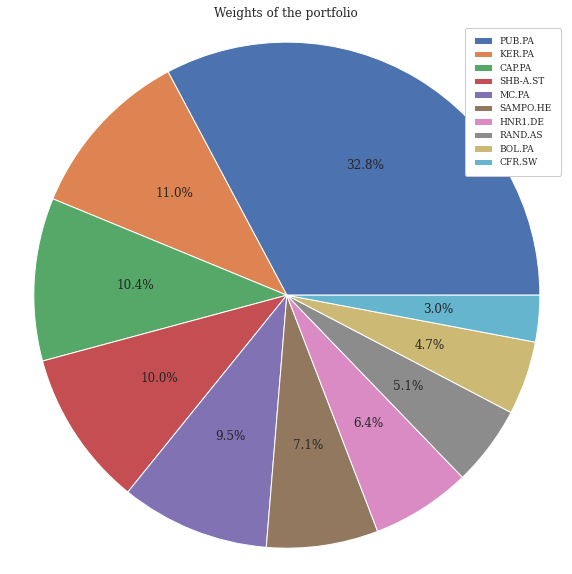

In [28]:
pf.plot_weights(weights[5])

It works!

# 4. Adding Transactions costs

We assume that the transaction cost is equal to 0.01% of the share price. I we assume that we currently have $\omega_{0}$ of a share $S$ with a price $P_{S}$ and we want to have $\omega_{1}$ of this share, the transaction cost will be equal to:
$$
\tau_{S} = 0.001*P_{S}(\omega_{1}-\omega_{0})
$$
This value is negative if we sell shares and positive if we buy shares.

The cost of all the transactions during the rebalancing of our portfolio is equal to:
$$
\tau_{P} = 0.001*\sum_{1}^{n}(P_{S_{i}}(\omega_{S_{i,1}}-\omega_{S_{i,0}}))
$$

In order to implement this strategy we will use the element of the third part.

In [29]:
weights_tc = {}
# For each period we calculate the weights of the portfolio and we store them in the dictionary
for i in dfs.keys():
    if i == 1:
        w,r,v = pf.opt_mean_variance_tc(rends=dfs[i],last_prices=prices[dfs[i].columns].loc[dfs[i].index[-1]],cov=dfs[i].cov(),obj_rend=0.10)
    else:
        w,r,v = pf.opt_mean_variance_tc(rends=dfs[i],last_prices=prices[dfs[i].columns].loc[dfs[i].index[-1]],last_weights=weights_tc[i-1],cov=dfs[i].cov(),obj_rend=0.10)
    weights_tc[i] = w

We take the weights of the previous period.
We take the weights of the previous period.


In [30]:
for key,value in weights_tc.items():
    # We check that the weights are different for each period and that they sum to 1
    print(f'Weights for the portfolio at the period {key}:\n {value}')
    print(f'Sum of the weights: {round(sum(value.values()),5)}')

Weights for the portfolio at the period 1:
 {'MC.PA': 0.266, 'RMS.PA': 0.182, 'KER.PA': 0.1, 'CAP.PA': -0.031, 'SAMPO.HE': 0.094, 'PUB.PA': 0.365, 'HNR1.DE': 0.164, 'RAND.AS': -0.01, 'BOL.PA': -0.131}
Sum of the weights: 0.999
Weights for the portfolio at the period 2:
 {'MC.PA': 0.027, 'CFR.SW': 0.062, 'RMS.PA': -0.013, 'KER.PA': 0.047, '6S=F': 0.771, 'SAMPO.HE': 0.087, 'PUB.PA': -0.003, 'HNR1.DE': -0.041, 'BOL.PA': 0.063}
Sum of the weights: 1.0
Weights for the portfolio at the period 3:
 {'MC.PA': 0.294, 'CFR.SW': -0.252, 'RMS.PA': 0.119, 'KER.PA': 0.429, 'CAP.PA': -0.129, 'SAMPO.HE': 0.333, 'PUB.PA': 0.061, 'SHB-A.ST': 0.133, 'RAND.AS': 0.005, 'BOL.PA': 0.007}
Sum of the weights: 1.0
Weights for the portfolio at the period 4:
 {'MC.PA': 0.06, 'CFR.SW': -0.029, 'RMS.PA': 0.022, 'KER.PA': 0.108, 'CAP.PA': -0.03, '6S=F': 0.672, 'SAMPO.HE': 0.047, 'PUB.PA': 0.113, 'SHB-A.ST': -0.015, 'HNR1.DE': 0.01, 'RAND.AS': 0.043}
Sum of the weights: 1.001
Weights for the portfolio at the period 5:

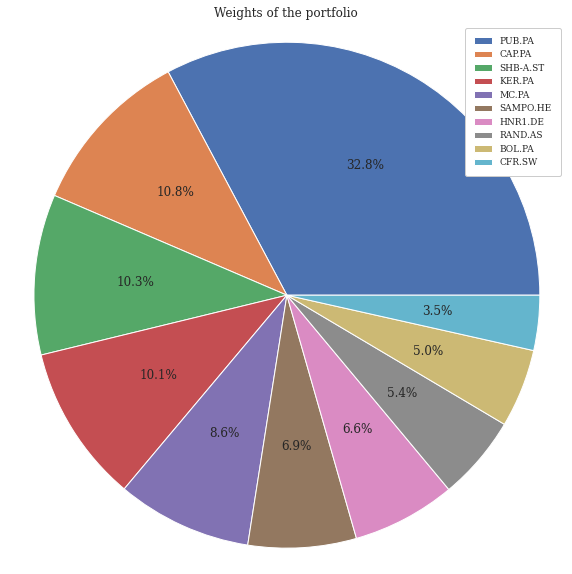

In [31]:
pf.plot_weights(weights_tc[6])

The weights between the two methods are differents that implies that the transactions costs are taken into account.

# 5. Computes the returns and comparing with the MSCI EUROPE

For each period we will know compute the return and compare this return with the return found for the MSCI EUROPE with the same period. In this exercice we will not use directly dfs because dfs doesn't take into account that some asset can be selected by using the fact that we use the weight of the previous period.

In [32]:
# All the periods
periods = pf.dynamic_df(rends,period_per_year=4)

In [33]:
# We do not work with the first period because it is the training period for the first wieghts
for i in list(periods.keys())[1:]:
    # This is how we will acces the dates of each period
    print(f"Begining of the period: {periods[i].index[0]}\nEnd of the period: {periods[i].index[-1]}\n")

Begining of the period: 2005-04-04 00:00:00
End of the period: 2005-06-30 00:00:00

Begining of the period: 2005-07-01 00:00:00
End of the period: 2005-09-29 00:00:00

Begining of the period: 2005-09-30 00:00:00
End of the period: 2005-12-28 00:00:00

Begining of the period: 2005-12-29 00:00:00
End of the period: 2006-03-29 00:00:00

Begining of the period: 2006-03-30 00:00:00
End of the period: 2006-06-27 00:00:00

Begining of the period: 2006-06-28 00:00:00
End of the period: 2006-09-25 00:00:00

Begining of the period: 2006-09-26 00:00:00
End of the period: 2006-12-25 00:00:00

Begining of the period: 2006-12-26 00:00:00
End of the period: 2007-03-23 00:00:00

Begining of the period: 2007-03-26 00:00:00
End of the period: 2007-06-25 00:00:00

Begining of the period: 2007-06-26 00:00:00
End of the period: 2007-09-21 00:00:00

Begining of the period: 2007-09-24 00:00:00
End of the period: 2007-12-21 00:00:00

Begining of the period: 2007-12-24 00:00:00
End of the period: 2008-03-25 00

In [34]:
weights_tc = {}
returns_tc = {}
vol_tc = {}
tri = 1
year = 0
for i in list(periods.keys())[1:]:
    rends_period = rends.loc[periods[i].index[0]:periods[i].index[-1]]
    # We calculate the weights of the portfolio
    if i == 2:
        w,r,v = pf.opt_mean_variance_tc(rends=periods[i-1],last_prices=prices[periods[i-1].columns].loc[periods[i-1].index[-1]],cov=periods[i-1].cov(),obj_rend=0.4)
    else:
        w,r,v = pf.opt_mean_variance_tc(rends=periods[i-1],last_prices=prices[periods[i-1].columns].loc[periods[i-1].index[-1]],last_weights=last_w,cov=periods[i-1].cov(),obj_rend=0.4)
    rends_period = rends_period[w.keys()]
    npw = np.array(list(w.values()))
    last_w  = w
    weights_tc[f"Q{tri%4+1}-{2005+year}"] = w
    returns_tc[f"Q{tri%4+1}-{2005+year}"] = pf.portfolio_rend(npw,rends_period)
    vol_tc[f"Q{tri%4+1}-{2005+year}"] = pf.portfolio_vol(npw,rends_period.cov())
    tri += 1
    if tri%4 == 0:
        year += 1

We take the weights of the previous period.
We take the weights of the previous period.


In [35]:
weights_tc

{'Q2-2005': {'MC.PA': -0.039,
  'RMS.PA': 0.139,
  'KER.PA': 0.186,
  'CAP.PA': 0.02,
  'IDEXF': 0.144,
  'SAMPO.HE': 0.046,
  'PUB.PA': 0.081,
  'KBC.BR': 0.01,
  'HNR1.DE': -0.097,
  'EBS.VI': 0.064,
  'RAND.AS': 0.046,
  'WFDRX': 0.15,
  'MB.MI': 0.117,
  'ATL.MI': -0.058,
  'BOL.PA': -0.029,
  'LBGUF': 0.155,
  'MF.PA': 0.067},
 'Q3-2005': {'MC.PA': 0.036,
  'CFR.SW': 0.125,
  'RMS.PA': -0.042,
  'KER.PA': -0.141,
  'IDEXF': -1.0,
  '6S=F': -0.127,
  'SAMPO.HE': 0.087,
  'G.MI': -0.03,
  'PUB.PA': -0.086,
  'HNR1.DE': -0.165,
  'EBS.VI': -0.013,
  'VIV.PA': 0.073,
  'PNDORA.CO': 0.644,
  'WFDRX': 0.353,
  'MB.MI': 0.049,
  'ATL.MI': 0.014,
  'BOL.PA': 0.06,
  'SECU-B.ST': 0.061,
  'LBGUF': 1.0,
  'MF.PA': 0.103},
 'Q4-2005': {'MC.PA': -0.174,
  'CFR.SW': -0.01,
  'RMS.PA': 0.068,
  'KER.PA': 0.149,
  'CAP.PA': 0.044,
  'IDEXF': -0.956,
  'SAMPO.HE': 0.005,
  'G.MI': -0.052,
  'PUB.PA': 0.063,
  'SHB-A.ST': 0.066,
  'KBC.BR': 0.004,
  'EBS.VI': 0.143,
  'GBLC.CN': -0.005,
  'RAND.AS

Now we are going to compute the returns and volatility for the MSCI EUROPE.

In [36]:
MSCI = pd.read_excel("datas/adjustedMSCIeurope.xlsx")
MSCI.set_index("Ticker Yahoo",inplace=True)
MSCI.drop(["CNH=X","CBK.DE","SW.PA"],axis=0,inplace=True)
MSCI.Weights = MSCI.Weights/100
Tickers = MSCI.index
weights_msci = {ticker:round(MSCI[MSCI.index == ticker].Weights.iloc[0],5) for ticker in Tickers}

In [37]:
weights_msci

{'NSRGY': 0.05655,
 'ASML': 0.04093,
 'ROG.SW': 0.03887,
 'MC.PA': 0.03403,
 'NVO': 0.03306,
 'NVS': 0.03197,
 'VTI': 0.02543,
 'SAP': 0.01938,
 'SIE.DE': 0.01768,
 'SNY': 0.01744,
 'OR.PA': 0.01477,
 'ALV.DE': 0.01477,
 'SU.PA': 0.01356,
 'AIR': 0.01296,
 'ZURN.SW': 0.01211,
 'AIR.PA': 0.01175,
 'IBE.MC': 0.01126,
 'DB': 0.01126,
 'UBS': 0.0109,
 'CFR.SW': 0.01066,
 'BNP.PA': 0.01041,
 'BMW.DE': 0.00957,
 'DG.PA': 0.00908,
 'CS.PA': 0.00896,
 'EL.PA': 0.00884,
 'DTG.DE': 0.00872,
 'ABB': 0.00872,
 'SAN': 0.00848,
 'BUD': 0.00823,
 'RMS.PA': 0.00823,
 'BAS.DE': 0.00799,
 'ING': 0.00799,
 'ENIC': 0.00727,
 'MUV2.DE': 0.00727,
 'IFX.DE': 0.00714,
 'KER.PA': 0.00714,
 'SAF.PA': 0.00702,
 'RI.PA': 0.0069,
 'LONN.SW': 0.00666,
 'BBVA': 0.00654,
 'SIKA.SW': 0.00642,
 'E': 0.0063,
 'ISP.MI': 0.0063,
 'EQNR': 0.00605,
 'BN.PA': 0.00569,
 'GIVN.SW': 0.00533,
 'CAP.PA': 0.00521,
 'AD.AS': 0.00521,
 'CRH': 0.00521,
 'DSV.V': 0.00496,
 'GMAB': 0.00496,
 '0QKY.IL': 0.00484,
 'WKL.AS': 0.00484,
 'VO

In [38]:
returns_msci = {}
vol_msci = {}
tri = 1
year = 0
for i in list(periods.keys())[1:]:
    rends_period = rends_msci.loc[periods[i].index[0]:periods[i].index[-1]]
    rends_period = rends_period[weights_msci.keys()]
    npw = np.array(list(weights_msci.values()))
    returns_msci[f"Q{tri%4+1}-{2005+year}"] = pf.portfolio_rend(npw,rends_period)
    vol_msci[f"Q{tri%4+1}-{2005+year}"] = pf.portfolio_vol(npw,rends_period.cov())
    tri += 1
    if tri%4 == 0:
        year += 1

# 6. Analysis

Now we are doing some analysis to compare the MSCI and our portfolio. We will only focus on the **10-years period** from **Q1-2013** to **Q4-2022**. 

In [39]:
size = 40
R_P = np.array(list(returns_tc.values())[-size:])
V_P = np.array(list(vol_tc.values())[-size:])
R_M = np.array(list(returns_msci.values())[-size:])
V_M = np.array(list(vol_msci.values())[-size:])
diff_rends = R_P - R_M
diff_vol = V_P - V_M

## Returns

In [40]:
# Percentage of negative quarterly returns
print(f"Percentage of positive quarterly returns for the portfolio: {round((R_P>= 0).sum()/(R_P.shape[0])*100,2)}% ({(R_P>= 0).sum()} quarters).")
print(f"Percentage of positive quarterly returns for the MSCI: {round((R_M>= 0).sum()/(R_M.shape[0])*100,2)}% ({(R_M>= 0).sum()} quarters).")

Percentage of positive quarterly returns for the portfolio: 70.0% (28 quarters).
Percentage of positive quarterly returns for the MSCI: 70.0% (28 quarters).


Our porfolio has **70%** of the time positive returns compared to **70%** of the time for the MSCI EUROPE (it's a difference of 5 quarters).

In [41]:
# Max Drawdown
print(f"Max Drawdown for the portfolio: {round(R_P.min()*100,2)}%")
print(f"Max Drawdown for the MSCI: {round(R_M.min()*100,2)}%")

Max Drawdown for the portfolio: -27.91%
Max Drawdown for the MSCI: -23.79%


We also observed the maximum drawdown of our portfolio and the MSCI Europe. We found a drawdown of **-27.91%** (annualized) during Q2-2015 and **-23.79%** for the MSCI (annualized) during Q1-2021.

In [42]:
# Highest return
print(f"Highest return for the portfolio: {round(R_P.max()*100,2)}%")
print(f"Highest return for the MSCI: {round(R_M.max()*100,2)}%")

Highest return for the portfolio: 102.57%
Highest return for the MSCI: 110.42%


We also observed the highest return of our portfolio and the MSCI Europe. We found a return of **88.43%** (annualized) during Q1-2013 and **110.42%** for the MSCI (annualized) during Q1-2015.

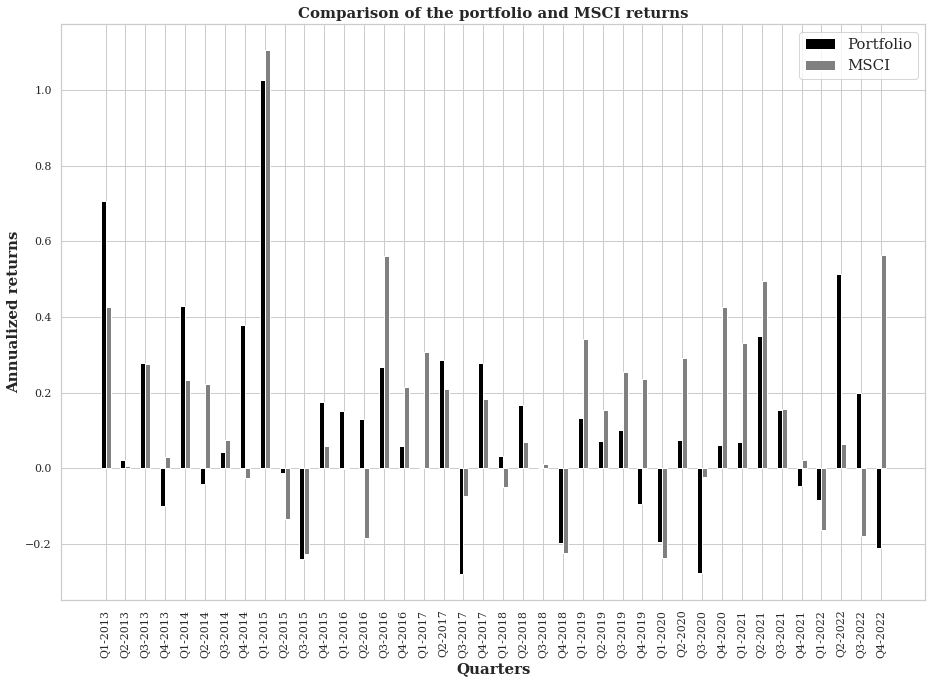

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = 40
width = 0.25
br1  = np.arange(size)
br2 = [x + width for x in br1]
ax.bar(br1, list(returns_tc.values())[-size:], color = 'black', width = width,label="Portfolio")
ax.bar(br2, list(returns_msci.values())[-size:], color = 'gray', width = width,label="MSCI")
plt.xlabel('Quarters', fontweight ='bold', fontsize = 15)
plt.ylabel('Annualized returns', fontweight ='bold', fontsize = 15)
plt.title("Comparison of the portfolio and MSCI returns", fontweight ='bold', fontsize = 15)
plt.xticks([r + width/2 for r in range(size)],list(returns_msci.keys())[-size:],rotation=90)
plt.legend(fontsize=15)
plt.show()

In [44]:
# (Not efficient) Average annualized return
print(f"Average annualized return for the portfolio: {round(np.array(list(returns_tc.values())).mean()*100,2)}%")
print(f"Average annualized return for the MSCI: {round(np.array(list(returns_msci.values())).mean()*100,2)}%")

Average annualized return for the portfolio: 9.81%
Average annualized return for the MSCI: 14.86%


## Volatility

In [45]:
# Average annualized volatility
print(f"Average annualized volatility for the portfolio: {round(np.array(list(vol_tc.values())).mean()*100,2)}%")
print(f"Average annualized volatility for the MSCI: {round(np.array(list(vol_msci.values())).mean()*100,2)}%")

Average annualized volatility for the portfolio: 12.98%
Average annualized volatility for the MSCI: 15.16%


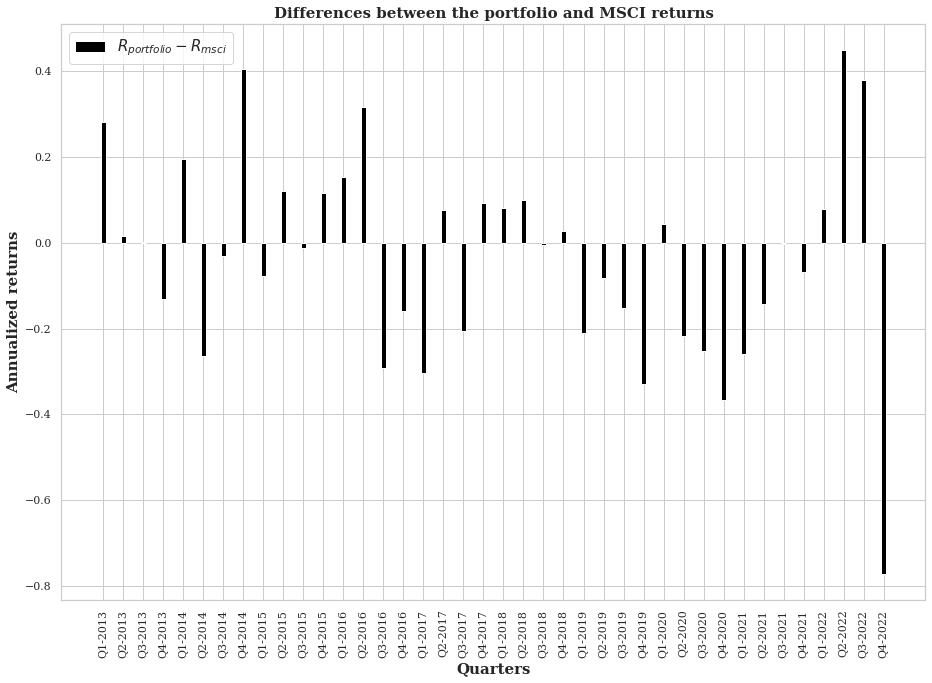

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = 40
width = 0.25
br1  = np.arange(size)
ax.bar(br1,diff_rends[-size:], color = 'black', width = width,label="$R_{portfolio}-R_{msci}$")
plt.xlabel('Quarters', fontweight ='bold', fontsize = 15)
plt.ylabel('Annualized returns', fontweight ='bold', fontsize = 15)
plt.title("Differences between the portfolio and MSCI returns", fontweight ='bold', fontsize = 15)
plt.xticks([r for r in range(size)],list(returns_msci.keys())[-size:],rotation=90)
plt.legend(fontsize=15)
plt.show()

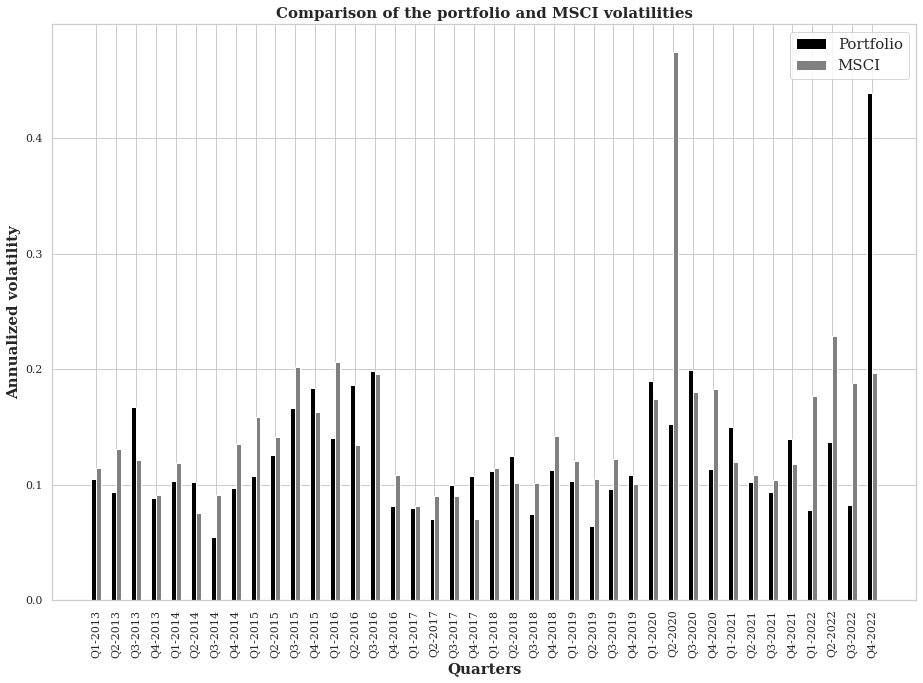

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = 40
width = 0.25
br1  = np.arange(size)
br2 = [x + width for x in br1]
ax.bar(br1, list(vol_tc.values())[-size:], color = 'black', width = width,label="Portfolio")
ax.bar(br2, list(vol_msci.values())[-size:], color = 'gray', width = width,label="MSCI")
plt.xlabel('Quarters', fontweight ='bold', fontsize = 15)
plt.ylabel('Annualized volatility', fontweight ='bold', fontsize = 15)
plt.title("Comparison of the portfolio and MSCI volatilities", fontweight ='bold', fontsize = 15)
plt.xticks([r + width/2 for r in range(size)],list(vol_msci.keys())[-size:],rotation=90)
plt.legend(fontsize=15)
plt.show()

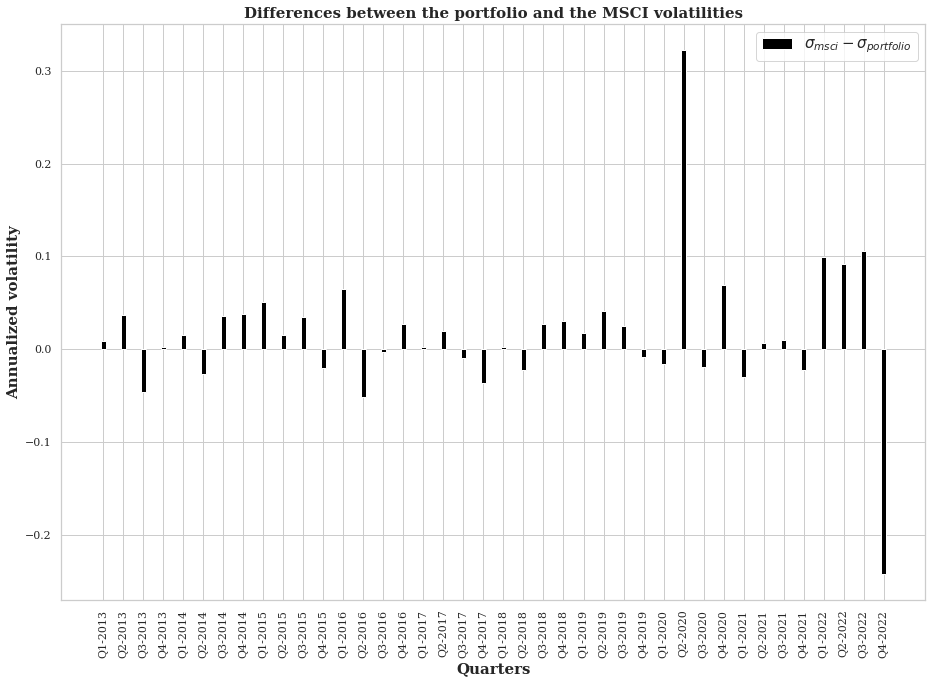

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = 40
width = 0.25
br1  = np.arange(size)
ax.bar(br1,-diff_vol[-size:], color = 'black', width = width,label="$\sigma_{msci}-\sigma_{portfolio}$")
plt.xlabel('Quarters', fontweight ='bold', fontsize = 15)
plt.ylabel('Annualized volatility', fontweight ='bold', fontsize = 15)
plt.title("Differences between the portfolio and the MSCI volatilities", fontweight ='bold', fontsize = 15)
plt.xticks([r for r in range(size)],list(returns_msci.keys())[-size:],rotation=90)
plt.legend(fontsize=15)
plt.show()

In [49]:
(-diff_vol[-40:] < 0).sum()/40

0.35

In [50]:
print(f"Gap between volatilities where the MSCI vol is lower than the Portfolio vol: {round(-diff_vol[-40:][(-diff_vol[-40:] < 0)].mean(),3)}")
print(f"Gap between volatilities where the MSCI vol is lower than the Portfolio vol: {round(-diff_vol[-40:][(-diff_vol[-40:] >= 0)].mean(),3)}")

Gap between volatilities where the MSCI vol is lower than the Portfolio vol: -0.04
Gap between volatilities where the MSCI vol is lower than the Portfolio vol: 0.046


In [51]:
((np.array(list(returns_msci.values()))-0.02)/np.array(list(vol_msci.values()))).mean()

1.173754783863184

In [52]:
(np.array(list(returns_tc.values()))-0.02)/(np.array(list(vol_tc.values()))).mean()

array([ 1.65721784,  1.8237328 ,  0.8196284 ,  0.93559095, -2.09044122,
        0.25749645,  2.18871029,  0.46456384, -1.09146897, -1.41977545,
       -3.27757565, -5.35185041,  0.31852408, -0.7571709 , -2.04211215,
        1.2816482 ,  0.33369841,  0.37396955,  0.04438408,  3.64528343,
        1.82388012,  1.44612587,  0.32514141, -0.55168522, -2.24324485,
        3.75319153,  0.19539903, -0.39672648,  3.2731148 ,  7.80957264,
        1.3918623 ,  5.29552345,  0.01630598,  1.98622184, -0.9172724 ,
        3.15225958, -0.46887921,  0.18561705,  2.76357114,  7.74798746,
       -0.25085032, -1.98877101,  1.18687283,  1.01464549,  0.86001552,
        1.91523792,  0.29080792, -0.11874344,  2.05661086, -2.30389331,
        1.98403673,  0.10196496,  1.13861499, -0.11638831, -1.67379209,
        0.87289315,  0.41092433,  0.63392668, -0.87189449, -1.643034  ,
        0.42356436, -2.28499065,  0.31887858,  0.38286944,  2.54743047,
        1.04213907, -0.51129023, -0.79317019,  3.79340432,  1.38

In [53]:
rends

,MC.PA,CFR.SW,RMS.PA,KER.PA,CAP.PA,IDEXF,6S=F,AMS.MC,SAMPO.HE,G.MI,...,VIV.PA,PNDORA.CO,WFDRX,MB.MI,ATL.MI,BOL.PA,SECU-B.ST,IDVA.SG,LBGUF,MF.PA
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,-0.005300,-0.011691,-0.006780,0.000674,-0.009963,0.014157,-0.006006,0.000000,-0.014720,0.004377,...,0.016142,-0.000148,0.014157,0.010042,0.009567,0.000000,-0.005881,0.000000,0.014157,-0.006458
2005-01-05,-0.015098,-0.021494,-0.010921,-0.012129,-0.001258,0.000146,0.000379,0.000000,-0.006972,-0.005151,...,-0.004073,-0.000591,0.000146,0.018227,-0.003491,-0.008403,-0.015323,0.000000,0.000146,0.005571
2005-01-06,0.003607,0.015251,0.001380,0.004775,-0.006297,0.007357,0.002661,0.000000,0.051154,-0.005575,...,-0.005317,-0.000094,0.007357,0.016273,-0.006506,0.000000,-0.011925,0.000000,0.007357,0.004617
2005-01-07,0.007188,-0.004374,-0.008959,0.010183,-0.012252,0.009347,0.000719,0.000000,0.000000,-0.000801,...,0.001234,0.000000,0.009347,-0.001601,0.000000,-0.003390,0.002291,0.000000,0.009347,-0.001838
2005-01-10,-0.006244,0.006278,0.019471,-0.002016,0.065868,-0.003736,-0.001618,0.000000,-0.018130,-0.003206,...,-0.006982,-0.000040,-0.003736,0.008019,0.011083,0.002551,0.008505,0.000000,-0.003736,0.014733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,-0.002848,-0.012240,-0.005716,-0.004382,0.001392,0.000781,0.000781,0.010933,-0.000208,-0.001180,...,0.004847,0.004541,0.000781,0.005335,-0.000436,0.003791,-0.015145,0.008983,0.000781,0.000565
2022-11-28,-0.002142,0.021559,0.011836,-0.000183,-0.010283,-0.009539,-0.000583,-0.014677,-0.009361,-0.013290,...,-0.006201,0.018145,-0.011035,-0.009764,0.000436,-0.008499,-0.009383,-0.026710,0.003914,-0.016384
2022-11-29,0.004723,0.023248,-0.008021,0.013573,-0.029767,0.001736,-0.002621,-0.003136,0.014910,0.014068,...,-0.012018,0.001231,-0.001462,-0.007931,0.000000,-0.002857,-0.009452,0.009148,0.002125,0.000000


In [54]:
indexs = []
period_10 = list(periods.values())[-40:]
for i in range(len(period_10)):
    indexs.append([period_10[i].index[0],period_10[i].index[-1]])

In [55]:
rends_period = rends.loc[indexs[0][0]:]
rends_period_msci = rends_msci.loc[indexs[0][0]:]

In [56]:
rends_period["Portfolio"] = np.nan
rends_period_msci["MSCI"] = np.nan

C:\Users\basho\AppData\Local\Temp\ipykernel_104056\2862789431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rends_period["Portfolio"] = np.nan
C:\Users\basho\AppData\Local\Temp\ipykernel_104056\2862789431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rends_period_msci["MSCI"] = np.nan


In [57]:
weights_period = list(weights_tc.values())[-40:]
for i in range(40):
    rends_period["Portfolio"].loc[indexs[i][0]:indexs[i][1]] = (rends_period.loc[indexs[i][0]:indexs[i][1],list(weights_period[i].keys())]*list(weights_period[i].values())).sum(axis=1)

C:\Users\basho\AppData\Local\Temp\ipykernel_104056\3048506666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rends_period["Portfolio"].loc[indexs[i][0]:indexs[i][1]] = (rends_period.loc[indexs[i][0]:indexs[i][1],list(weights_period[i].keys())]*list(weights_period[i].values())).sum(axis=1)
C:\Users\basho\AppData\Local\Temp\ipykernel_104056\3048506666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rends_period["Portfolio"].loc[indexs[i][0]:indexs[i][1]] = (rends_period.loc[indexs[i][0]:indexs[i][1],list(weights_period[i].keys())]*list(weights_period[i].values())).sum(axis=1)
C:\Users\basho\AppData\Local\Temp\ip

In [58]:
rends_period_msci["MSCI"] = (rends_period_msci[weights_msci.keys()]*list(weights_msci.values())).sum(axis=1)

C:\Users\basho\AppData\Local\Temp\ipykernel_104056\2920038603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rends_period_msci["MSCI"] = (rends_period_msci[weights_msci.keys()]*list(weights_msci.values())).sum(axis=1)


In [59]:
annu_rend_p = pf.annu_rend(rends_period["Portfolio"])
annu_rend_msci = pf.annu_rend(rends_period_msci["MSCI"])
annu_vol_p = rends_period["Portfolio"].std()*np.sqrt(252)
annu_vol_msci = rends_period_msci["MSCI"].std()*np.sqrt(252)

In [60]:
print(f"Annualized return over 10-years periods for our porfolio: {round(annu_rend_p*100,2)}%")
print(f"Annualized return over 10-years periods for the msci: {round(annu_rend_msci*100,2)}%")

Annualized return over 10-years periods for our porfolio: 8.27%
Annualized return over 10-years periods for the msci: 11.72%


In [61]:
print(f"Annualized volatility over 10-years periods for our porfolio: {round(annu_vol_p*100,2)}%")
print(f"Annualized volatility over 10-years periods for the msci: {round(annu_vol_msci*100,2)}%")

Annualized volatility over 10-years periods for our porfolio: 14.04%
Annualized volatility over 10-years periods for the msci: 15.63%


In [62]:
sharpe_p  = (annu_rend_p - 0.02)/annu_vol_p
sharpe_msci  = (annu_rend_msci - 0.02)/annu_vol_msci

In [63]:
print(f"Sharpe ratio over 10-years periods for our porfolio: {round(sharpe_p,3)}")
print(f"Sharpe ratio over 10-years periods for the msci: {round(sharpe_msci,3)}")

Sharpe ratio over 10-years periods for our porfolio: 0.447
Sharpe ratio over 10-years periods for the msci: 0.621


In [64]:
total_p = 1000*(1+0.0827)**(rends_period["Portfolio"].shape[0]/252)
total_m = 1000*(1+0.09865)**(rends_period_msci["MSCI"].shape[0]/252)
total_A = 1000*(1+0.02)**(rends_period_msci["MSCI"].shape[0]/252)
print(f"Total value of the portfolio after 10 years: {round(total_p,2)}")
print(f"Total value of the msci after 10 years: {round(total_m,2)}")
print(f"Total value of the livre-A after 10 years: {round(total_A,2)}")

Total value of the portfolio after 10 years: 2253.65
Total value of the msci after 10 years: 2617.19
Total value of the livre-A after 10 years: 1224.47


# 7. ADDITIONAL PART: Biodiversity strategy

We are using two methods in order to evaluate the biodiversity of our portfolio (on the period Q1 2010 to 2022). The first method is to approximate the biodiversity  by using the environment score of yahoo finance. This approximation is based on the fact that the biodiversity is the diversity of species in a the world or a particular habitat and if a company has a good environment score this implies that it will help to have a better biodiversity (the company doesn't degrade the environment). The second method is to focus on sectors of our porfolio and the impact of each sector on biodiversity.

## Method 1: Environment score

In [185]:
# Data for yahoo fiance
esg = pd.read_excel('./datas/MSCIeurope.xlsx', index_col=0)

In [186]:
esg.head()

,Ticker,Ticker Yahoo,Nom,Secteur,Equity class,Market Share,Weights,Valeur notionnelle,Actions,ISIN,Currency,Environment Score,Social Score,Governance Score,Total Score
0,NESN,NSRGY,NESTLE SA,Biens de consommation de base,Actions,"EUR 48 274 991,14",4.67,48274991.14,420838,CH0038863350,CHF,8.60,10.80,4.70,24.00
1,ASML,ASML,ASML HOLDING NV,Technologie de l'informatioon,Actions,"EUR 34 906 428,20",3.38,34906428.20,60802,NL0010273215,EUR,3.60,2.60,4.80,11.00
2,ROG,ROG.SW,ROCHE HOLDING PAR AG,Santé,Actions,"EUR 33 188 774,68",3.21,33188774.68,104989,CH0012032048,CHF,2.48,11.54,9.52,23.53
3,MC,MC.PA,LVMH,Biens de consommation cycliques,Actions,"EUR 29 028 191,40",2.81,29028191.40,41457,FR0000121014,EUR,0.76,5.93,5.67,12.37
4,NOVOB,NVO,NOVO NORDISK CLASS B,Santé,Actions,"EUR 28 242 417,87",2.73,28242417.87,247375,DK0060534915,DKK,2.10,13.50,8.40,24.00


In [187]:
# We set the index as the yahoo ticker and transpose the DataFrame
esg.set_index('Ticker Yahoo',inplace=True,drop=True)
esg = esg.T

In [188]:
# We keep the tickers of our portfolio
esg_portfolio = esg[tickers]
esg_msci = esg

In [189]:
esg_portfolio.head()

Ticker Yahoo,MC.PA,CFR.SW,RMS.PA,KER.PA,CAP.PA,IDEXF,6S=F,AMS.MC,SAMPO.HE,G.MI,...,VIV.PA,PNDORA.CO,WFDRX,MB.MI,ATL.MI,BOL.PA,SECU-B.ST,IDVA.SG,LBGUF,MF.PA
Ticker,MC,CFR,RMS,KER,CAP,ITX,SREN,AMS,SAMPO,G,...,VIV,PNDORA,URW,MB,ATL,BOL,SECU B,INDU C,LUND B,MF
Nom,LVMH,COMPAGNIE FINANCIERE RICHEMONT SA,HERMES INTERNATIONAL,KERING SA,CAPGEMINI,INDUSTRIA DE DISENO TEXTIL INDITEX,SWISS RE AG,AMADEUS IT GROUP SA,SAMPO,ASSICURAZIONI GENERALI,...,VIVENDI,PANDORA,UNIBAIL RODAMCO WE STAPLED UNITS,MEDIOBANCA BANCA DI CREDITO FINANZ,ATLANTIA,BOLLORE,SECURITAS B,INDUSTRIVARDEN SERIES,LUNDBERGFORETAGEN CLASS B,WENDEL
Secteur,Biens de consommation cycliques,Biens de consommation cycliques,Biens de consommation cycliques,Biens de consommation cycliques,Technologie de l'informatioon,Biens de consommation cycliques,Finance,Technologie de l'informatioon,Finance,Finance,...,la communication,Biens de consommation cycliques,Immobilier,Finance,Industries,la communication,Industries,Finance,Finance,Finance
Equity class,Actions,Actions,Actions,Actions,Actions,Actions,Actions,Actions,Actions,Actions,...,Actions,Actions,Actions,Actions,Actions,Actions,Actions,Actions,Actions,Actions
Market Share,"EUR 29 028 191,40","EUR 9 091 311,62","EUR 6 984 434,00","EUR 6 130 807,90","EUR 4 434 894,80","EUR 4 085 452,80","EUR 3 758 973,76","EUR 3 452 431,50","EUR 3 451 714,42","EUR 2 803 861,95",...,"EUR 937 607,78","EUR 916 988,28","EUR 895 747,75","EUR 848 696,07","EUR 837 909,36","EUR 723 185,80","EUR 605 568,63","EUR 599 170,90","EUR 502 176,59","EUR 358 602,00"


In [190]:
# We collect the environment score of each company of our portfolio
environment_score_p = esg_portfolio.loc["Environment Score"]
environment_score_msci = esg_msci.loc["Environment Score"]

In [191]:
environment_score_p

Ticker Yahoo
MC.PA        0.76
CFR.SW       0.49
RMS.PA       0.75
KER.PA       0.86
CAP.PA        0.5
IDEXF        1.16
6S=F          0.9
AMS.MC       1.02
SAMPO.HE     1.15
G.MI         0.69
VNA.DE       0.78
CABK.MC      0.47
PUB.PA       0.01
SHB-A.ST     0.73
KBC.BR       0.62
HNR1.DE      0.66
EBS.VI       1.09
AENA.MC      0.51
EXO.AS       1.01
GBLC.CN       0.1
BVI.PA       0.07
RAND.AS      0.03
VIV.PA       0.05
PNDORA.CO     1.1
WFDRX         0.1
MB.MI        0.49
ATL.MI        1.1
BOL.PA       0.06
SECU-B.ST    0.91
IDVA.SG      0.07
LBGUF        0.17
MF.PA        0.06
Name: Environment Score, dtype: object

Now we are doing a weigthing average to compare the evolution in the time of the environment score of our portfolio against the MSCI one.

In [205]:
mean_env_p = []

In [206]:
for weigths in list(weights_tc.values())[-40:]:
    value = 0
    for name in weigths:
        value += environment_score_p.loc[name]*weigths[name]
    mean_env_p.append(round(value,2))

In [207]:
weights_msci

{'NSRGY': 0.05655,
 'ASML': 0.04093,
 'ROG.SW': 0.03887,
 'MC.PA': 0.03403,
 'NVO': 0.03306,
 'NVS': 0.03197,
 'VTI': 0.02543,
 'SAP': 0.01938,
 'SIE.DE': 0.01768,
 'SNY': 0.01744,
 'OR.PA': 0.01477,
 'ALV.DE': 0.01477,
 'SU.PA': 0.01356,
 'AIR': 0.01296,
 'ZURN.SW': 0.01211,
 'AIR.PA': 0.01175,
 'IBE.MC': 0.01126,
 'DB': 0.01126,
 'UBS': 0.0109,
 'CFR.SW': 0.01066,
 'BNP.PA': 0.01041,
 'BMW.DE': 0.00957,
 'DG.PA': 0.00908,
 'CS.PA': 0.00896,
 'EL.PA': 0.00884,
 'DTG.DE': 0.00872,
 'ABB': 0.00872,
 'SAN': 0.00848,
 'BUD': 0.00823,
 'RMS.PA': 0.00823,
 'BAS.DE': 0.00799,
 'ING': 0.00799,
 'ENIC': 0.00727,
 'MUV2.DE': 0.00727,
 'IFX.DE': 0.00714,
 'KER.PA': 0.00714,
 'SAF.PA': 0.00702,
 'RI.PA': 0.0069,
 'LONN.SW': 0.00666,
 'BBVA': 0.00654,
 'SIKA.SW': 0.00642,
 'E': 0.0063,
 'ISP.MI': 0.0063,
 'EQNR': 0.00605,
 'BN.PA': 0.00569,
 'GIVN.SW': 0.00533,
 'CAP.PA': 0.00521,
 'AD.AS': 0.00521,
 'CRH': 0.00521,
 'DSV.V': 0.00496,
 'GMAB': 0.00496,
 '0QKY.IL': 0.00484,
 'WKL.AS': 0.00484,
 'VO

In [208]:
# We compute the mean environment score for the msci
mean_env_msci = 0
for name in weights_msci:
    mean_env_msci += environment_score_msci.loc[name]*weights_msci[name]
mean_env_msci = round(mean_env_msci,2)

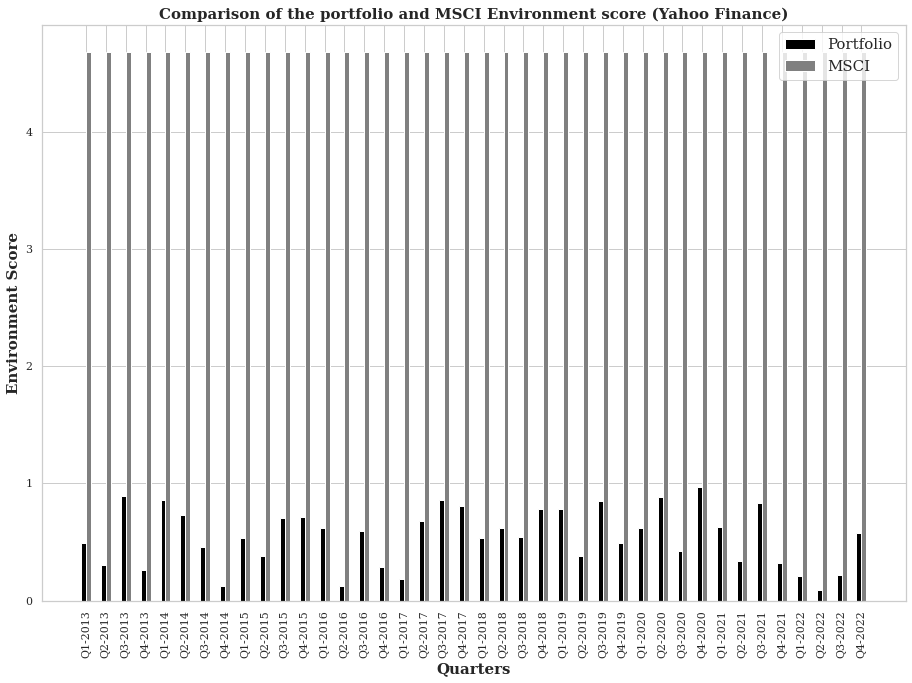

In [209]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = 40
width = 0.25
br1  = np.arange(size)
br2 = [x + width for x in br1]
ax.bar(br1, mean_env_p, color = 'black', width = width,label="Portfolio")
ax.bar(br2, np.repeat(mean_env_msci,size), color = 'gray', width = width,label="MSCI")
plt.xlabel('Quarters', fontweight ='bold', fontsize = 15)
plt.ylabel('Environment Score', fontweight ='bold', fontsize = 15)
plt.title("Comparison of the portfolio and MSCI Environment score (Yahoo Finance)", fontweight ='bold', fontsize = 15)
plt.xticks([r + width/2 for r in range(size)],list(vol_msci.keys())[-size:],rotation=90)
plt.legend(fontsize=15)
plt.show()

The result is clear, the environment score of our portfolio is far way lower than the MSCI. This result is logical because we applied filters on environment score to choose our assets.

## Method 2: Sector analysis with ENCORE Biodiversity

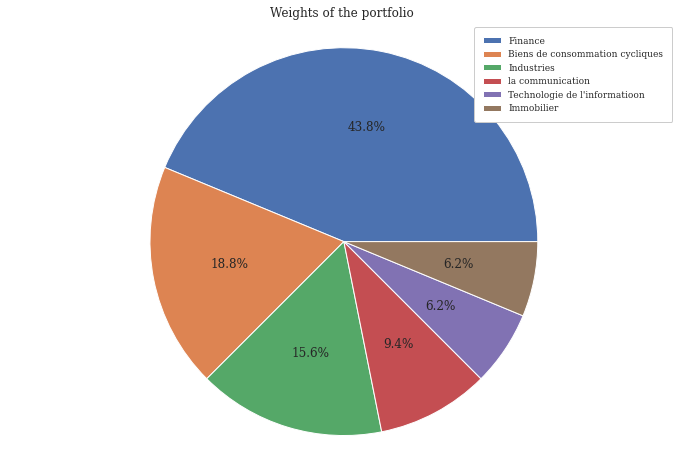

In [215]:
# Plot the diversity of our sectors
sectors = esg_portfolio.loc["Secteur"].value_counts()

def func(pct, values):
    if pct < 2:
        return ""
    return "{:.1f}%".format(pct)

plt.pie(sectors,autopct=lambda pct: func(pct,sectors))
plt.axis('equal')
plt.title('Weights of the portfolio')
plt.legend(labels=sectors.index,borderpad=1,fancybox=True,framealpha=1,prop={'size': 9})
plt.show()